<a href="https://colab.research.google.com/github/Nalina01/Covid-Analysis/blob/main/Covid_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving covid.csv to covid.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("covid.csv")

In [6]:
df.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region,iso_alpha
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas,USA
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas,BRA
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia,IND
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe,RUS
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa,ZAF


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    float64
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
 16  iso_alpha         209 non-null    object 
dt

In [8]:
df.describe()

,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
count,2.080000e+02,2.090000e+02,4.000000,188.000000,3.000000,2.050000e+02,3.000000,2.050000e+02,122.000000,208.000000,187.000000,1.910000e+02,191.000000
mean,3.041549e+07,9.171850e+04,1980.500000,3792.590426,300.000000,5.887898e+04,1706.000000,2.766433e+04,534.393443,3196.024038,98.681176,1.402405e+06,83959.366492
std,1.047661e+08,4.325867e+05,3129.611424,15487.184877,451.199512,2.566984e+05,2154.779803,1.746327e+05,2047.518613,5191.986457,174.956862,5.553367e+06,152730.591240
min,8.010000e+02,1.000000e+01,20.000000,1.000000,1.000000,7.000000e+00,42.000000,0.000000e+00,1.000000,3.000000,0.080000,6.100000e+01,4.000000
25%,9.663140e+05,7.120000e+02,27.500000,22.000000,40.500000,3.340000e+02,489.000000,8.600000e+01,3.250000,282.000000,6.000000,2.575200e+04,8956.500000
50%,7.041972e+06,4.491000e+03,656.000000,113.000000,80.000000,2.178000e+03,936.000000,8.990000e+02,27.500000,1015.000000,29.000000,1.357020e+05,32585.000000
75%,2.575614e+07,3.689600e+04,2609.000000,786.000000,449.500000,2.055300e+04,2538.000000,7.124000e+03,160.250000,3841.750000,98.000000,7.576960e+05,92154.500000
max,1.381345e+09,5.032179e+06,6590.000000,162804.000000,819.000000,2.576668e+06,4140.000000,2.292707e+06,18296.000000,39922.000000,1238.000000,6.313960e+07,995282.000000


In [9]:
df.isnull().sum()

Country/Region        0
Continent             1
Population            1
TotalCases            0
NewCases            205
TotalDeaths          21
NewDeaths           206
TotalRecovered        4
NewRecovered        206
ActiveCases           4
Serious,Critical     87
Tot Cases/1M pop      1
Deaths/1M pop        22
TotalTests           18
Tests/1M pop         18
WHO Region           25
iso_alpha             0
dtype: int64

In [11]:
df=df.apply(lambda x:x.fillna(x.mean())
                       if x.dtype=='float' else
                       x.fillna(x.value_counts().index[0]))

In [12]:
df.isnull().sum()

Country/Region      0
Continent           0
Population          0
TotalCases          0
NewCases            0
TotalDeaths         0
NewDeaths           0
TotalRecovered      0
NewRecovered        0
ActiveCases         0
Serious,Critical    0
Tot Cases/1M pop    0
Deaths/1M pop       0
TotalTests          0
Tests/1M pop        0
WHO Region          0
iso_alpha           0
dtype: int64

In [14]:
df[df['Country/Region'] == 'India'].sns.boxplot(y=df['Population'])

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region,iso_alpha
2,India,Asia,1.381345e+09,2025409,1980.5,41638.0,300.0,1377384.0,1706.0,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia,IND


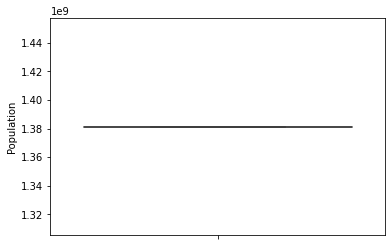

In [68]:
sns.boxplot(y=ds['Population'])

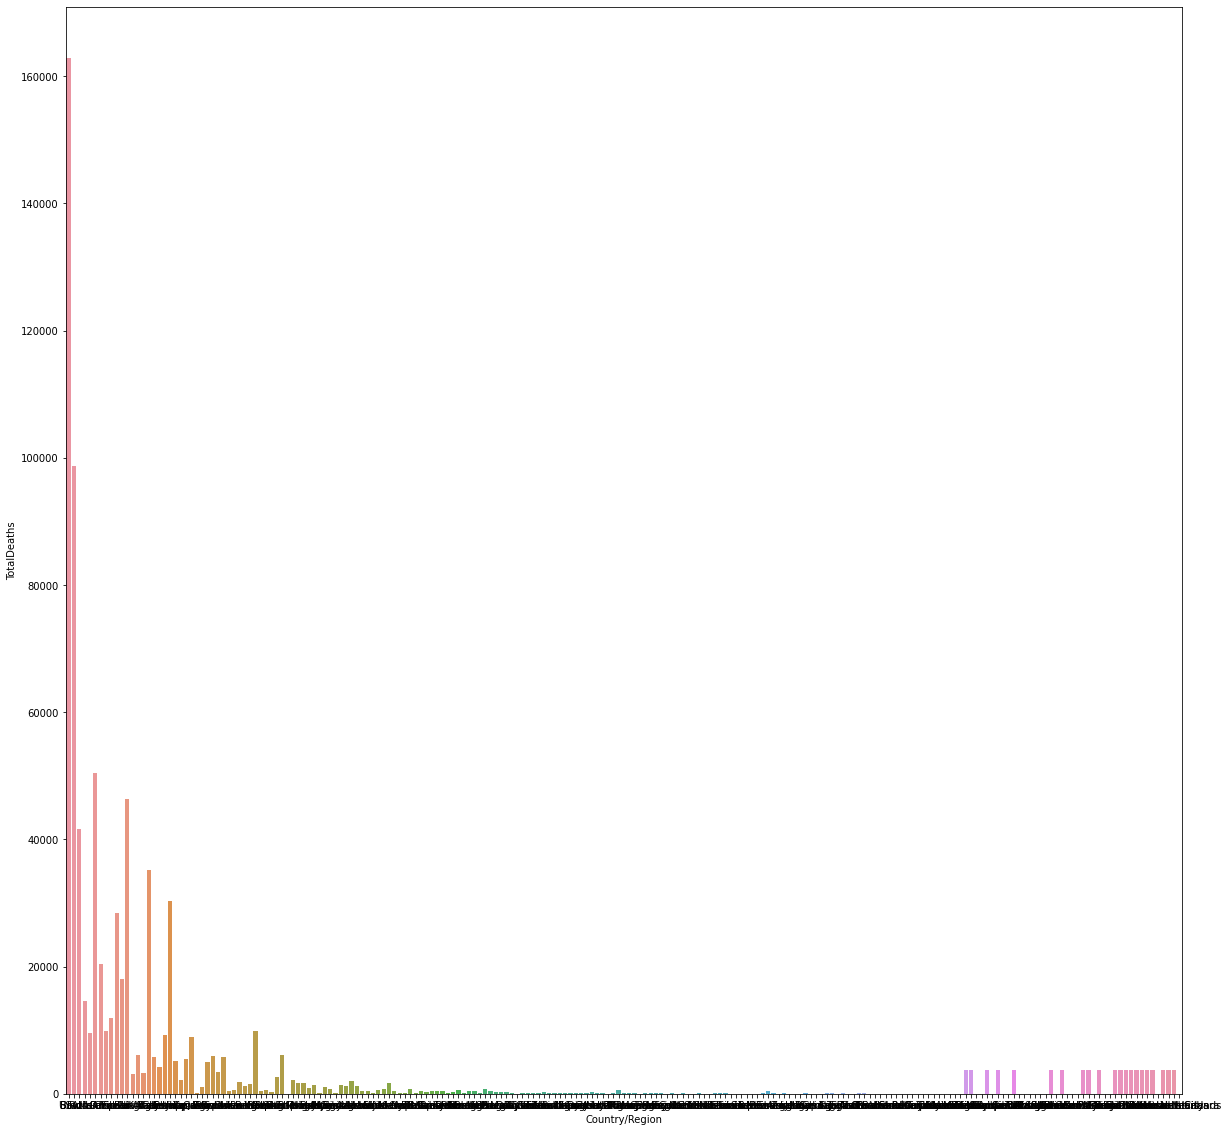

In [63]:
fig = plt.figure(figsize = (20, 20))
sns.barplot(x = 'Country/Region' ,y ='TotalDeaths', data=df)
plt.show()

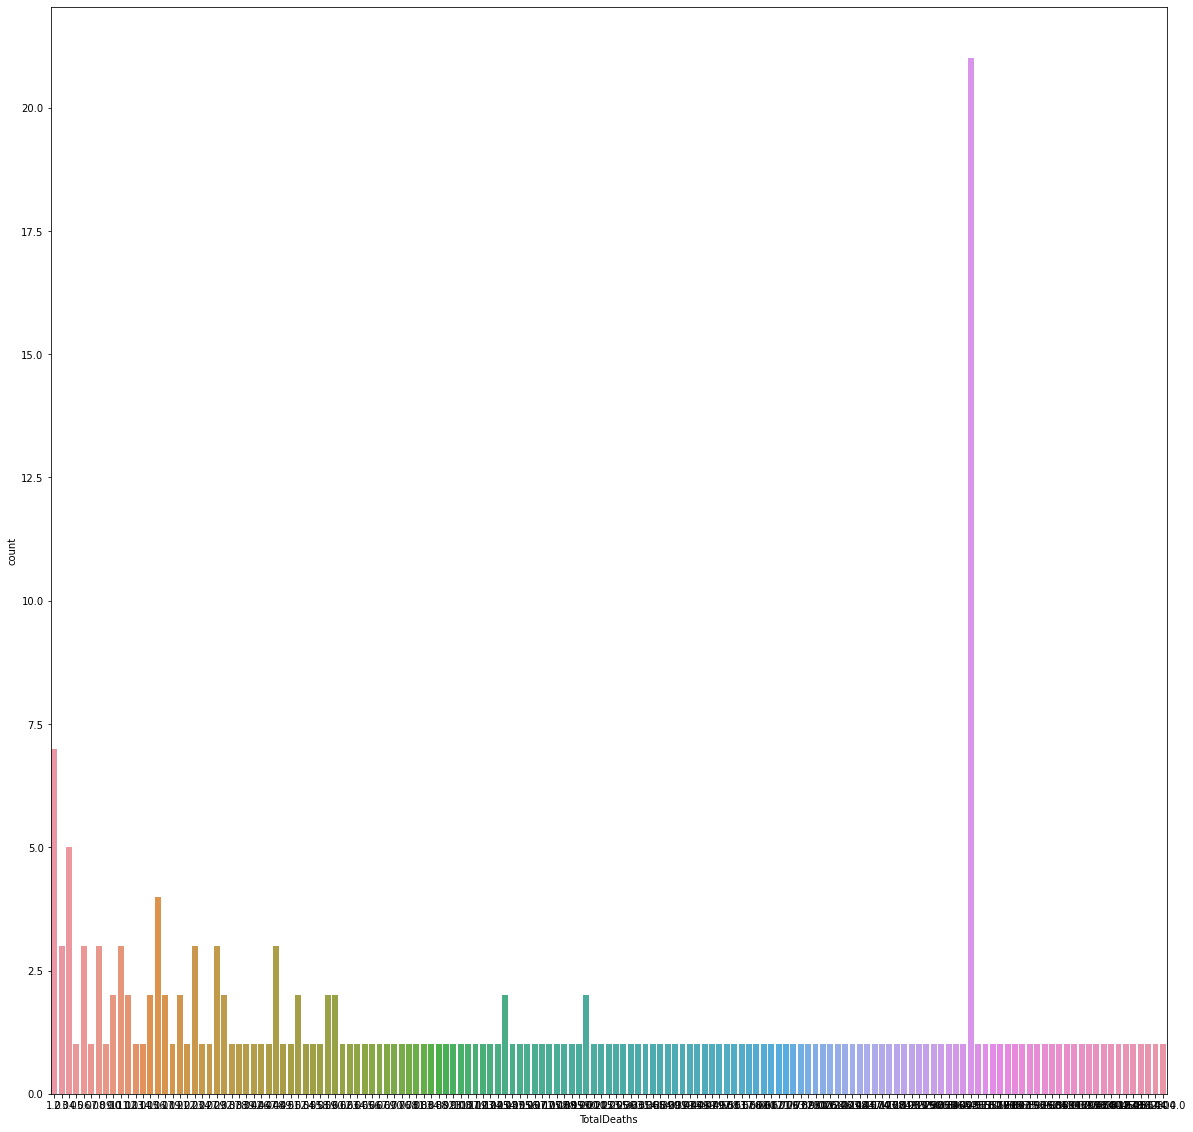

In [62]:
fig = plt.figure(figsize = (20, 20))
sns.countplot(x = 'TotalDeaths', data=df)
plt.show()

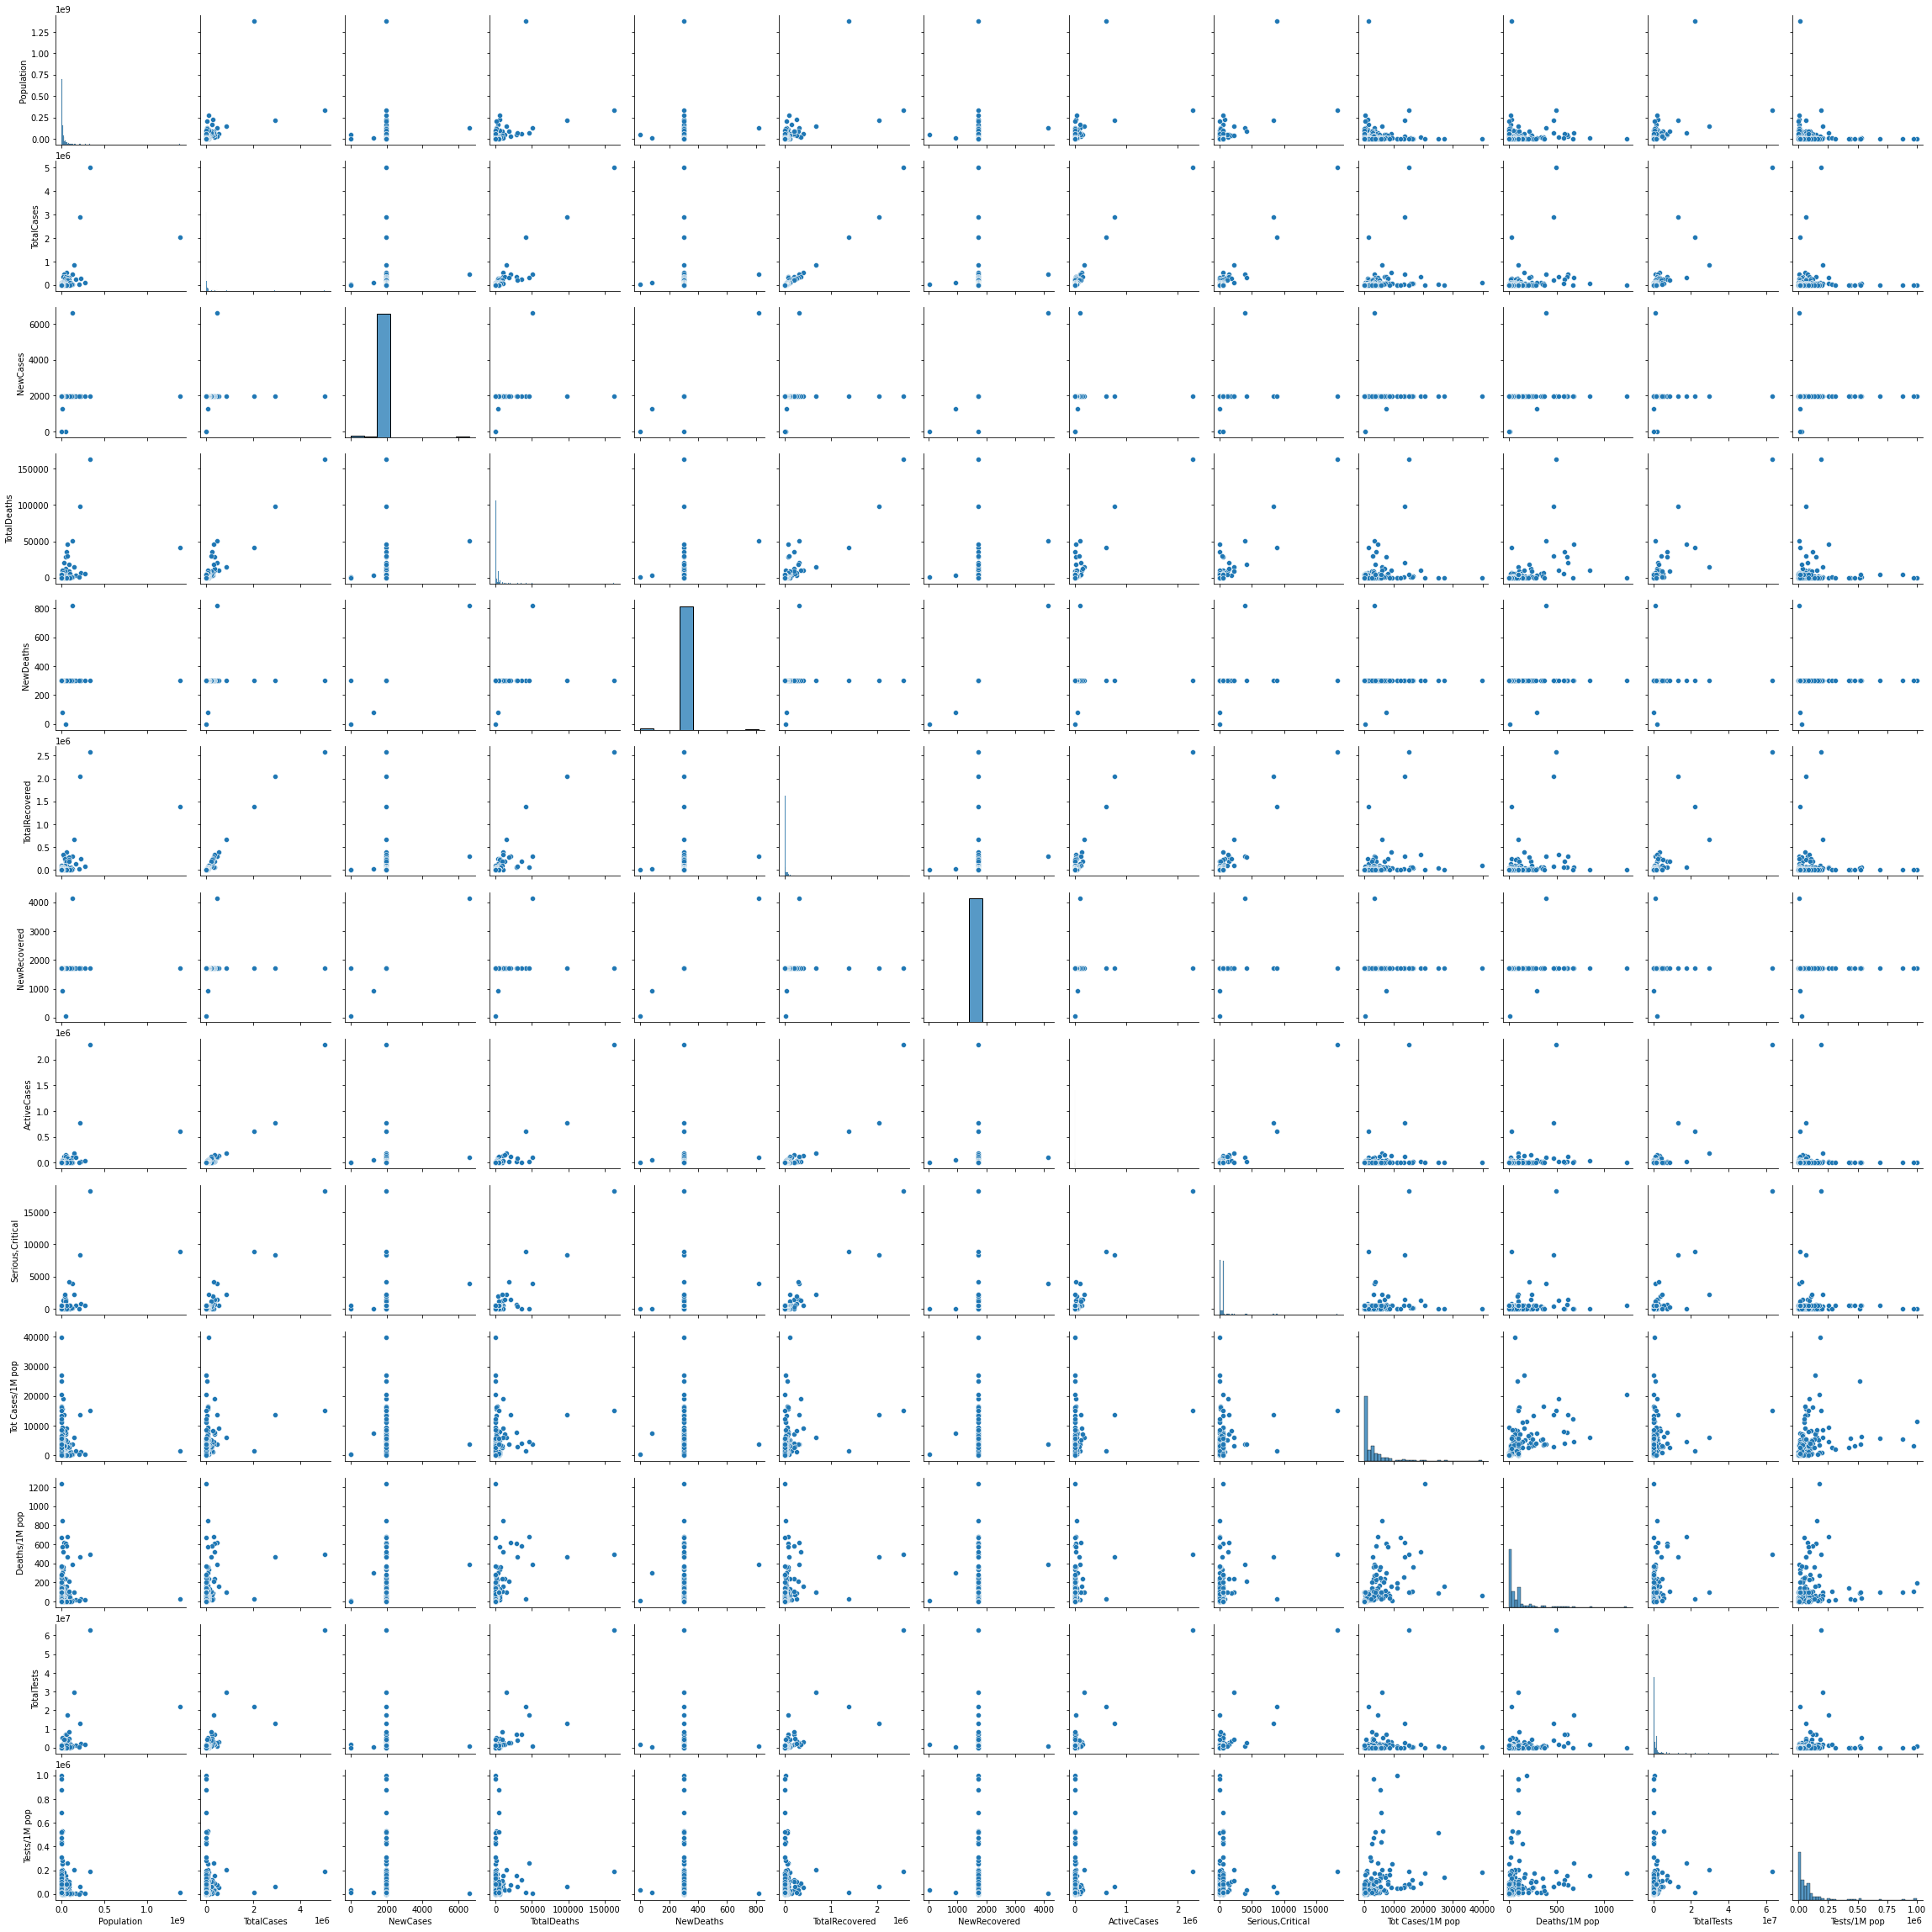

In [27]:
  sns.pairplot(df)

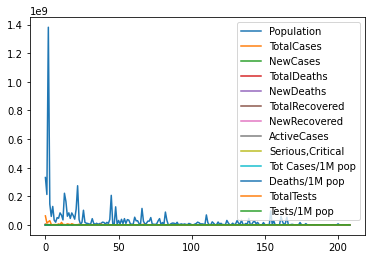

In [28]:
df.plot()

(array([204.,   2.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   1.]),
 array([1.0000000e+01, 5.0322690e+05, 1.0064438e+06, 1.5096607e+06,
        2.0128776e+06, 2.5160945e+06, 3.0193114e+06, 3.5225283e+06,
        4.0257452e+06, 4.5289621e+06, 5.0321790e+06]),
 <a list of 10 Patch objects>)

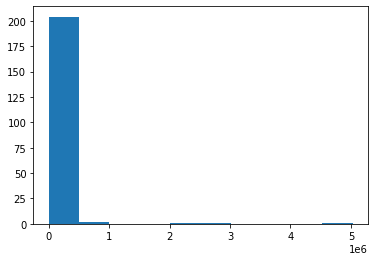

In [33]:
plt.hist(df['TotalCases'])

Text(0.5, 1.0, 'journey by month day')

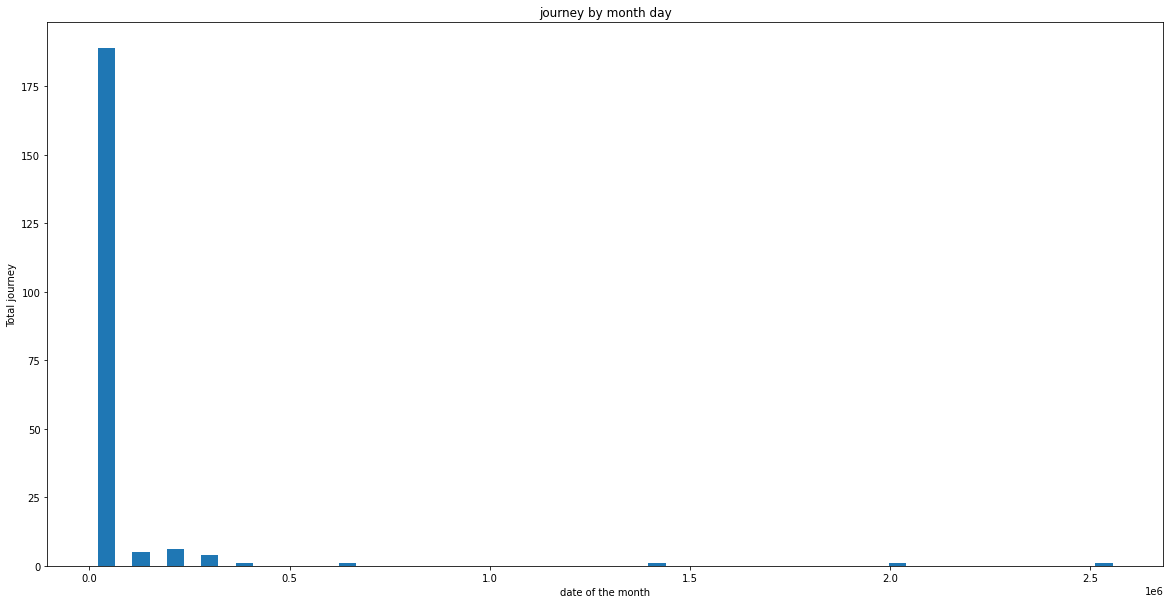

In [36]:
plt.figure(figsize=(20,10))
plt.hist(df['TotalRecovered'],bins=30,rwidth=0.5)
plt.xlabel('date of the month')
plt.ylabel('Total journey')
plt.title('journey by month day')

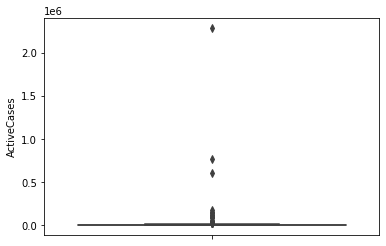

In [41]:
sns.boxplot(y="ActiveCases",data=df)

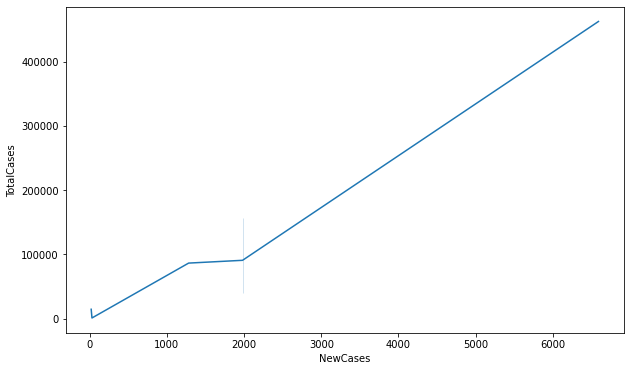

In [42]:

plt.figure(figsize=(10,6))
sns.lineplot(x='NewCases',y='TotalCases',data=df)

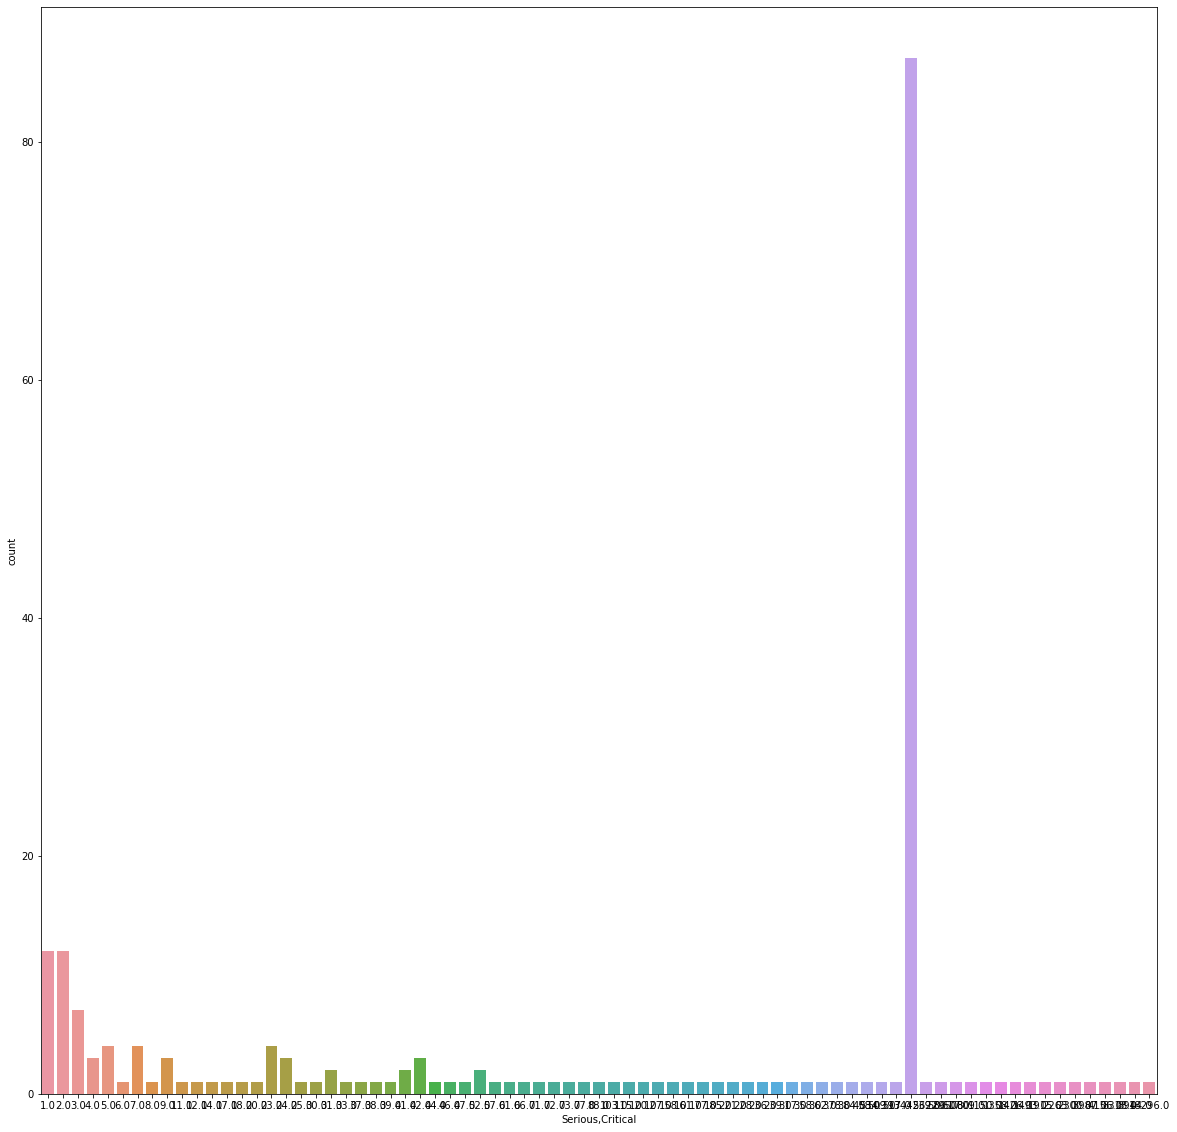

In [46]:
plt.figure(figsize=(20,20))
sns.countplot(x=df['Serious,Critical'])

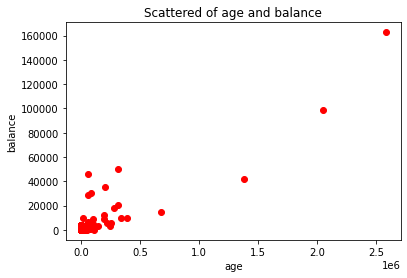

In [47]:
plt.scatter(df['TotalRecovered'],df['TotalDeaths'],c='red')
plt.title('Scattered of age and balance')
plt.xlabel('age')
plt.ylabel('balance')
plt.show()

In [49]:
df['iso_alpha'].value_counts()

       10
FRA     3
NLD     3
NIC     2
NGA     2
       ..
TGO     1
ABW     1
JAM     1
GUF     1
AND     1
Name: iso_alpha, Length: 193, dtype: int64

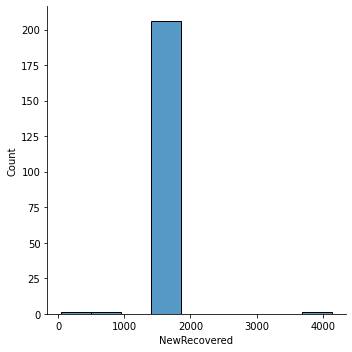

In [58]:
sns.displot(df['NewRecovered'])

In [57]:
import plotly.express as px
fig = px.line(df, x='Tot Cases/1M pop', y='Deaths/1M pop', color='Country/Region')
fig.show()

In [61]:
dateg = df.groupby('ActiveCases').sum()
fig = px.line(x=dateg.index,y=dateg['TotalCases'],title= 'Growth of covid-19 cases over time',labels=dict(x='Total Cases',y='Active Cases'))
fig.show()